# Carregamentos

## Bibliotecas

In [2]:
# pip install simpledbf

In [8]:
# pip install dbfread

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
# from simpledbf import Dbf5
from dbfread import DBF
import matplotlib.pyplot as plt

## Dados

### Carregamento dos arquivos DBF

In [14]:
dbf_amazon = DBF('../../data/raw/amazonia/yearly_deforestation/yearly_deforestation.dbf')

### Conversão em dataframes pandas

In [17]:
df_amazon_raw = pd.DataFrame(iter(dbf_amazon))

## Funçoes

In [20]:
def create_time_features(ts):
    ts['year'] = ts.index.year
    ts['month'] = ts.index.month
    ts['day'] = ts.index.day
    ts['dayofyear'] = ts.index.dayofyear
    ts['month_day'] = ts.index.strftime('%m/%d')
    ts['year_month'] = ts.index.strftime('%Y/%m')

    return ts  
    

# Exploração

Análise exploratória inicial: Utilizando Python e bibliotecas como Pandas, realizamos uma análise exploratória dos dados de queimadas, buscando identificar padrões temporais, geográficos e variações sazonais no comportamento dos incêndios. Visualizações gráficas, como histogramas e gráficos de séries temporais, foram geradas para facilitar a interpretação dos dados.


Picos sazonais: Observamos que a maior incidência de queimadas ocorre nos meses de seca, especialmente entre agosto e outubro.


Distribuição geográfica: As áreas com maior concentração de focos de incêndio estão localizadas nas regiões sul e sudeste da Amazônia Legal, como os estados do Pará e Mato Grosso.


Aparencia das primeiras linhas do dataframe, para avaliação visual da qualidade dos dados

In [25]:
df_amazon_raw.head()

,fid,state,path_row,main_class,class_name,sub_class,def_cloud,julian_day,image_date,year,area_km,scene_id,source,satellite,sensor,uuid
0,16,AM,00166,DESMATAMENTO,d2021,d2021,NaN,211,2021-07-30,2021.0,6.335015,951.0,,,,0987ddbe-9f23-4cec-91d3-2a06032c29e8
1,24,MT,22768,DESMATAMENTO,d2015,d2015,0.0,226,2015-08-14,2015.0,0.778199,2491.0,,,,1c19e5ee-db69-4f54-88d8-159dc554d2fe
2,59687,PA,22562,DESMATAMENTO,d2015,d2015,0.0,196,2015-07-15,2015.0,0.005600,2573.0,,,,845e0d68-29ca-471a-999a-83b1e040b13a
3,59688,PA,22562,DESMATAMENTO,d2015,d2015,0.0,196,2015-07-15,2015.0,0.000084,2573.0,,,,f7b54b10-bf0e-47ce-8b1b-09776a2dfa70
4,130,PA,22363,DESMATAMENTO,d2022,corte raso com solo exposto,NaN,209,2022-07-28,2022.0,0.120332,1443.0,Amazonia,Landsat,OLI,260dda0d-6030-4cd0-8141-b97cf9b0f2eb


Nome das colunas carregadas 

In [28]:
df_amazon_raw.columns

Index(['fid', 'state', 'path_row', 'main_class', 'class_name', 'sub_class',
       'def_cloud', 'julian_day', 'image_date', 'year', 'area_km', 'scene_id',
       'source', 'satellite', 'sensor', 'uuid'],
      dtype='object')

Formato do dataframe com número total de linhas e colunas

In [31]:
df_amazon_raw.shape

(749665, 16)

Avaliando as dimensões dos dados é possível inferir que se trate de um apanhado díario de focos de incendio e desmatamento

Avaliação das estatisticas descritivas do DF

In [35]:
df_amazon_raw.describe(include='all')

,fid,state,path_row,main_class,class_name,sub_class,def_cloud,julian_day,image_date,year,area_km,scene_id,source,satellite,sensor,uuid
count,749665.000000,749665,749665,749665,749665,749665,591576.000000,749665.000000,749665,749665.000000,7.496650e+05,749635.000000,749665,749665,749665,749665
unique,NaN,10,210,1,16,20,NaN,NaN,1134,NaN,NaN,NaN,4,3,3,749665
top,NaN,PA,22463,DESMATAMENTO,d2008,corte raso com solo exposto,NaN,NaN,2019-08-11,NaN,NaN,NaN,,,,0987ddbe-9f23-4cec-91d3-2a06032c29e8
freq,NaN,342699,36657,749665,68414,75948,NaN,NaN,12111,NaN,NaN,NaN,629131,629130,629130,1
mean,374833.000000,NaN,NaN,NaN,NaN,NaN,290.211131,220.264435,NaN,2015.874281,1.714922e-01,19130.891589,NaN,NaN,NaN,NaN
std,216409.789113,NaN,NaN,NaN,NaN,NaN,707.141636,31.145195,NaN,4.825156,5.446836e-01,38157.546721,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,2008.000000,3.600000e-14,0.000000,NaN,NaN,NaN,NaN
25%,187417.000000,NaN,NaN,NaN,NaN,NaN,0.000000,208.000000,NaN,2011.000000,6.355766e-02,816.000000,NaN,NaN,NaN,NaN
50%,374833.000000,NaN,NaN,NaN,NaN,NaN,0.000000,219.000000,NaN,2016.000000,8.905186e-02,1455.000000,NaN,NaN,NaN,NaN
75%,562249.000000,NaN,NaN,NaN,NaN,NaN,0.000000,233.000000,NaN,2020.000000,1.506559e-01,2494.000000,NaN,NaN,NaN,NaN


In [37]:
df_amazon_raw['main_class'].unique()

array(['DESMATAMENTO'], dtype=object)

O dataframe apenas apresenta registros classificados como desmatamento, observado pelo valor do atributo Main_class que apenas contém o valor desmatamento

In [40]:
df_amazon_raw['year'].unique()

array([2021., 2015., 2022., 2023., 2011., 2012., 2013., 2019., 2018.,
       2017., 2016., 2009., 2014., 2010., 2008., 2020.])

In [42]:
df_amazon_raw['year'].nunique()

16

Contemplando um total de 16 anos de dados 2008 : 2023

In [45]:
df_amazon_raw['sub_class'].unique()

array(['d2021', 'd2015', 'corte raso com solo exposto',
       'corte raso com vegetação', 'd2011', 'mineração', 'd2012', 'd2013',
       'd2019', 'd2018', 'desmatamento por degradação progressiva',
       'd2017', 'd2016', 'd2009', 'd2014', 'd2010', 'd2008', 'd2020',
       'floresta inundada', 'd2022'], dtype=object)

Muito embora algumas das sub classes sejam de entendimento intuitivo, como corte raso com solo exposto, é necessário a obtençao dos metadados para entendimento correto do que se trata subclasses como d2021

In [48]:
df_amazon_raw.dtypes

fid             int64
state          object
path_row       object
main_class     object
class_name     object
sub_class      object
def_cloud     float64
julian_day      int64
image_date     object
year          float64
area_km       float64
scene_id      float64
source         object
satellite      object
sensor         object
uuid           object
dtype: object

Check para avaliar se existe mais de uma area analisada por dia

In [51]:
df_amazon_raw['image_date'] 

0         2021-07-30
1         2015-08-14
2         2015-07-15
3         2015-07-15
4         2022-07-28
             ...    
749660    2023-07-30
749661    2023-08-21
749662    2023-07-31
749663    2023-07-22
749664    2023-07-25
Name: image_date, Length: 749665, dtype: object

In [53]:
# Convertendo a coluna image_date para datetime
df_amazon_raw['image_date'] = pd.to_datetime(df_amazon_raw['image_date'])

In [55]:
df_amazon_raw[df_amazon_raw['image_date'] == '2019-08-12']

,fid,state,path_row,main_class,class_name,sub_class,def_cloud,julian_day,image_date,year,area_km,scene_id,source,satellite,sensor,uuid
2740,214153,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.195734,69.0,,,,db4552b2-db5b-45f7-bc44-13e0dc8a7075
65347,58958,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.092908,69.0,,,,64b2871d-b54d-4d11-b332-4fbc3a9b07ea
110255,105640,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.070650,69.0,,,,356df8ec-4bcc-4919-af28-63cb3d93eb15
117189,113056,AM,23262,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.103743,220.0,,,,399bbc5b-2007-4e2f-aefa-035f938fd816
120215,116231,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.094652,69.0,,,,40b50363-faad-4971-92ab-c73875400ee2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559751,558413,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.308408,69.0,,,,523f00c2-5687-48ff-b1a8-bc0adc4fafed
560302,558970,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.351919,69.0,,,,bd390878-c3ec-4d26-96a4-2d2bdd56cb49
564382,563104,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.195732,69.0,,,,f448cc4b-7c0a-4684-874e-b2f9593caf85
574600,573328,RO,23268,DESMATAMENTO,d2019,d2019,0.0,224,2019-08-12,2019.0,0.081325,69.0,,,,b4afaba5-90a7-4b19-a07f-3bdd9856328c


Criaçao de timeseries para analise temporal dos dados de kilometragem

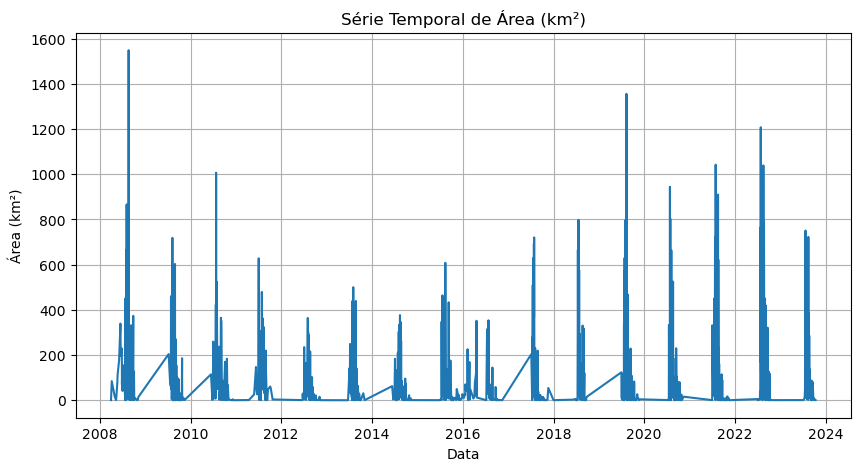

In [58]:
ts_amazon = df_amazon_raw.groupby(['image_date'], as_index=False).aggregate({'area_km':'sum'})
anos = [str(ano) for ano in range(2008, 2025)]
# Definindo a coluna image_date como índice
ts_amazon.set_index('image_date', inplace=True)


# Plotando a série temporal
plt.figure(figsize=(10, 5))
plt.plot(ts_amazon.index, ts_amazon['area_km'])
plt.title('Série Temporal de Área (km²)')
plt.xlabel('Data')
plt.ylabel('Área (km²)')
plt.grid()
plt.show()

subset com medias mensais das areas

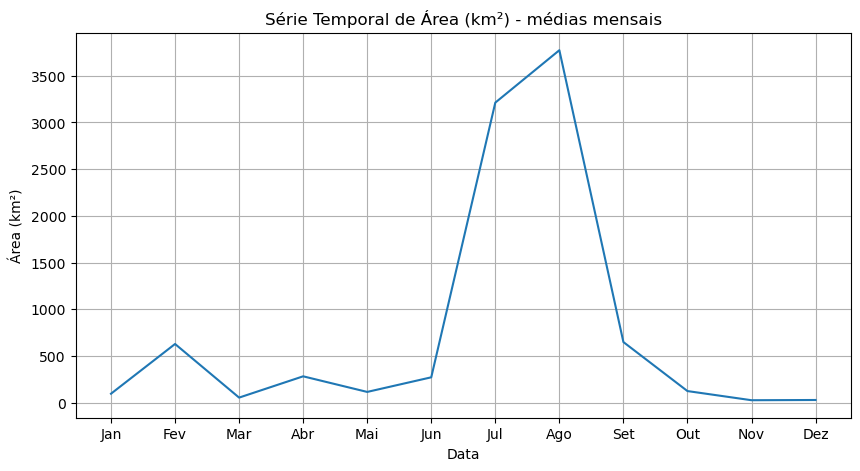

In [61]:
# ts_amazon = df_amazon_raw.groupby(['image_date'], as_index=False).aggregate({'area_km':'sum'})
ts_amazon = create_time_features(ts_amazon)
ts_amazon_avg_month_year = ts_amazon.groupby(['month', 'year'], as_index=False).aggregate({'area_km':'sum'})
ts_amazon_avg_month = ts_amazon_avg_month_year.groupby(['month'], as_index=False).aggregate({'area_km':'mean'})

# Plotando a série temporal
plt.figure(figsize=(10, 5))
plt.plot(ts_amazon_avg_month['month'], ts_amazon_avg_month['area_km'])
plt.title('Série Temporal de Área (km²) - médias mensais')
plt.xlabel('Data')
plt.ylabel('Área (km²)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid()
plt.show()

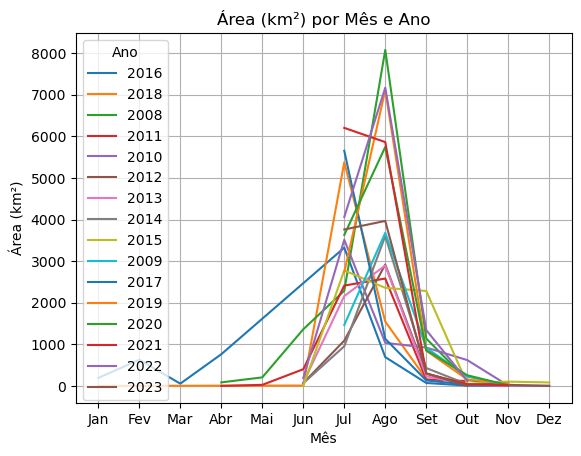

In [63]:
# ts_amazon = df_amazon_raw.groupby(['image_date'], as_index=False).aggregate({'area_km':'sum'})

for ano in ts_amazon_avg_month_year['year'].unique():
    subset = ts_amazon_avg_month_year[ts_amazon_avg_month_year['year'] == ano]
    plt.plot(subset.month, subset['area_km'], label=str(ano))

# Configurando o gráfico
plt.title('Área (km²) por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Área (km²)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Ano')
plt.grid()
plt.show()

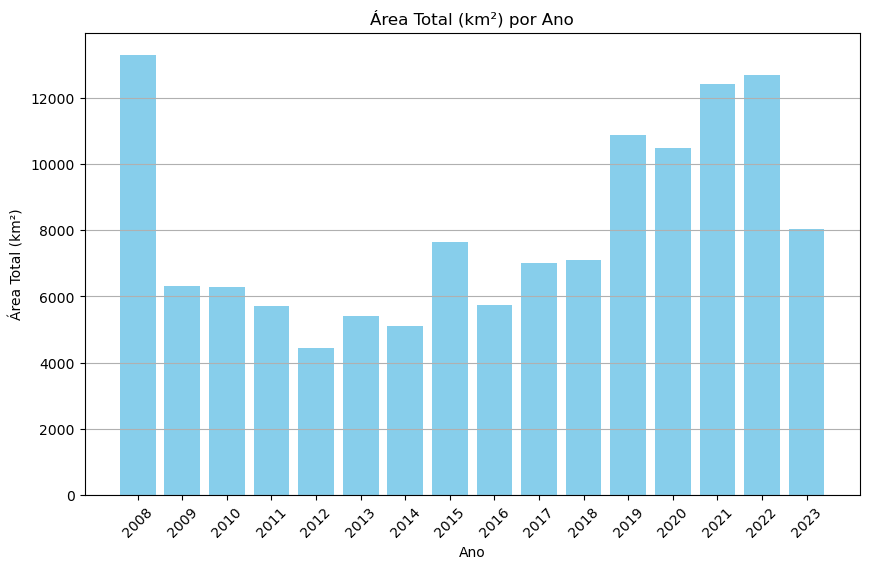

In [65]:
ts_amazon_year = ts_amazon.groupby(['year'], as_index=False).aggregate({'area_km':'sum'})


# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ts_amazon_year['year'].astype(str), ts_amazon_year['area_km'], color='skyblue')
plt.title('Área Total (km²) por Ano')
plt.xlabel('Ano')
plt.ylabel('Área Total (km²)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()